In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import tensorflow as tf
import tensorflow.keras
from keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout

In [2]:
test_df = pd.read_csv("/Users/dinamaizlis/Desktop/dl/sign_mnist_test.csv")
train_df = pd.read_csv("/Users/dinamaizlis/Desktop/dl/sign_mnist_train.csv")

In [3]:
##the data

In [4]:
print(f"{train_df.shape = }")
print(f"{test_df.shape = }")

train_df.shape = (27455, 785)
test_df.shape = (7172, 785)


In [5]:
train_df.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195


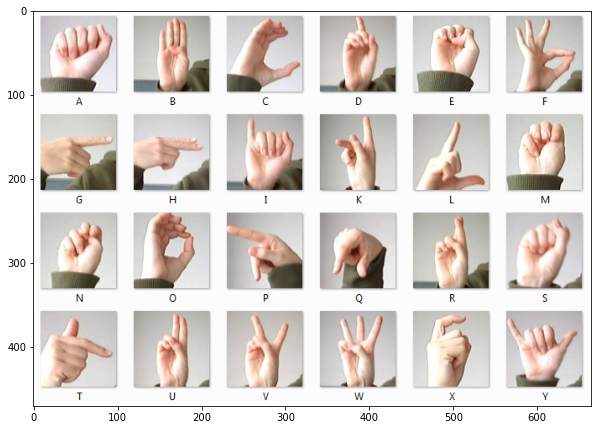

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
img = plt.imread('/Users/dinamaizlis/Desktop/dl/amer_sign2.png')
plt.imshow(img)
plt.show()

/Users/dinamaizlis/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


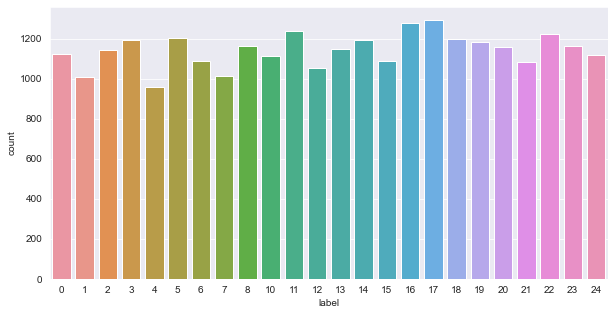

In [7]:
plt.figure(figsize = (10,5))
sns.set_style("darkgrid")
sns.countplot(train_df['label'])
plt.show()

# sns.countplot(x= label)
# plt.show()

In [8]:
train_df["label"].value_counts()

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

In [9]:
#split test and train

In [10]:
y_train= train_df.pop('label').values
x_train = train_df.values
y_test= test_df.pop('label').values
x_test = test_df.values

### KNN model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
model = KNeighborsClassifier(n_neighbors = 1) 
model.fit(x_train,y_train)
prediction = model.predict(x_test)
print(" {} knn score: {} ".format(3,model.score(x_test,y_test)))

 3 knn score: 0.8103736754043502 


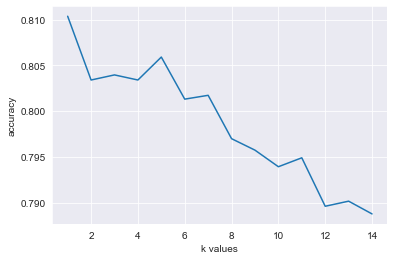

In [12]:
score_list = []
for each in range(1,15):
    model = KNeighborsClassifier(n_neighbors = each)
    model.fit(x_train,y_train)
    score_list.append(model.score(x_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

## SVM model

In [13]:
from sklearn.svm import SVC
model= SVC(kernel='poly')
model.fit(x_train,y_train)
print("print accuracy of svm algo: ",model.score(x_test,y_test))

print accuracy of svm algo:  0.782069157836029


## RANDOM_FOREST model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
model = RandomForestClassifier(n_estimators = 100,random_state = 1)
model.fit(x_train,y_train)
print("random forest algo result: ",model.score(x_test,y_test))

random forest algo result:  0.814835471277189


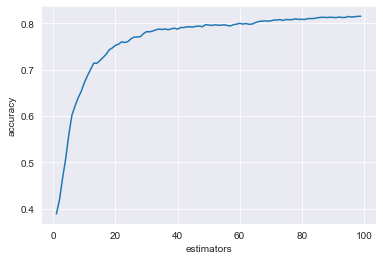

In [15]:
score_rf = []
for each in range(1,100):
    model = RandomForestClassifier(n_estimators = each,random_state = 1)
    model.fit(x_train,y_train)
    score_rf.append(model.score(x_test,y_test))
    
plt.plot(range(1,100),score_rf)
plt.xlabel("estimators")
plt.ylabel("accuracy")
plt.show()

## CNN model

In [16]:
size  = 28
channels = 1
batch = 128
epochs = 100

In [18]:
## Prepare Data
train_df = train_df /255
test_df  = test_df /255
train = np.array(train_df)
test  = np.array(test_df)
train = train.reshape(train.shape[0],28,28,1)
test  = test.reshape(test.shape[0],28,28,1)

In [19]:
model =Sequential([Conv2D(filters=32,  kernel_size=(3,3), activation="relu", input_shape=(size,size,channels)),
                    MaxPool2D(2,2, padding='same'),
                    Dropout(0.2),
                 
                    Conv2D(filters=128,  kernel_size=(3,3), activation="relu"),
                    MaxPool2D(2,2, padding='same'),
                    Dropout(0.2),
                
                    Conv2D(filters=512, kernel_size=(3,3), activation="relu"),
                    MaxPool2D(2,2, padding='same'),
                    Dropout(0.2),
                    
                    Flatten(),
                    
                    Dense(units=4096, activation="relu"),                 
                    Dropout(0.2),
                    
                    Dense(units=1024, activation="relu"),
                    Dropout(0.2),
                                  
                    Dense(units=256, activation="relu"),
                    Dropout(0.2),
                    
                    Dense(units=25, activation="softmax"),
])
model.summary()

2022-02-13 22:25:47.898873: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 128)         0

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [21]:
# history = model.fit(train,y_train,epochs=10,validation_data=(test,y_test))
# history
model.fit(train,y_train,epochs=10,validation_data=(test,y_test))

Epoch 1/10


/Users/dinamaizlis/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


858/858 [==============================] - 220s 255ms/step - loss: 1.5148 - accuracy: 0.4963 - val_loss: 0.4058 - val_accuracy: 0.8491
Epoch 2/10
858/858 [==============================] - 227s 264ms/step - loss: 0.1646 - accuracy: 0.9446 - val_loss: 0.2011 - val_accuracy: 0.9529
Epoch 3/10
858/858 [==============================] - 222s 259ms/step - loss: 0.0817 - accuracy: 0.9762 - val_loss: 0.1726 - val_accuracy: 0.9490
Epoch 4/10
858/858 [==============================] - 185s 216ms/step - loss: 0.0627 - accuracy: 0.9824 - val_loss: 0.2382 - val_accuracy: 0.9473
Epoch 5/10
858/858 [==============================] - 197s 230ms/step - loss: 0.0517 - accuracy: 0.9852 - val_loss: 0.1689 - val_accuracy: 0.9520
Epoch 6/10
858/858 [==============================] - 186s 216ms/step - loss: 0.0449 - accuracy: 0.9877 - val_loss: 0.1314 - val_accuracy: 0.9643
Epoch 7/10
858/858 [==============================] - 181s 211ms/step - loss: 0.0449 - accuracy: 0.9887 - val_loss: 0.2192 - val_accura

In [ ]:
loss, acc = model.evaluate(test,y_test,verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))
